# NLP Email Classifier

We're going to get some data, refine it, design and use some vectorizing techniques to classify data which would be email messages into spam/ham values.

In [81]:
import nltk
import string
from nltk.corpus import stopwords
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [12]:
df = pd.read_csv('../emails.csv', names=['Message', 'label'])

In [13]:
df.head()

,Message,label
0,text,spam
1,Subject: naturally irresistible your corporate...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: 4 color printing special request add...,1


In [14]:
df = df[1:]

In [15]:
df.head()

,Message,label
1,Subject: naturally irresistible your corporate...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: 4 color printing special request add...,1
5,"Subject: do not have money , get software cds ...",1


In [16]:
df.describe()

,Message,label
count,5728,5728
unique,5695,2
top,Subject: re : get together this coming tuesday...,0
freq,2,4360


In [17]:
df.groupby('label').describe()

Message                                                               
        count unique                                                top freq
label                                                                       
0        4360   4327  Subject: hello from enron  dear dr . mcmullen ...    2
1        1368   1368  Subject: does your business depend on the onli...    1

In [18]:
df['length'] = df['Message'].apply(len)

In [19]:
df.head()

,Message,label,length
1,Subject: naturally irresistible your corporate...,1,1484
2,Subject: the stock trading gunslinger fanny i...,1,598
3,Subject: unbelievable new homes made easy im ...,1,448
4,Subject: 4 color printing special request add...,1,500
5,"Subject: do not have money , get software cds ...",1,235


## Visuals

Let's look at some graphs based on some attributes of our data

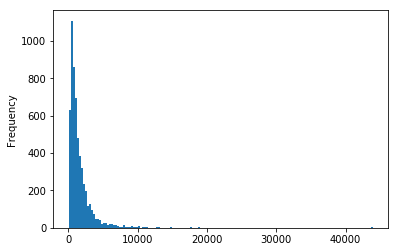

In [ ]:
df['length'].plot.hist(bins=150)

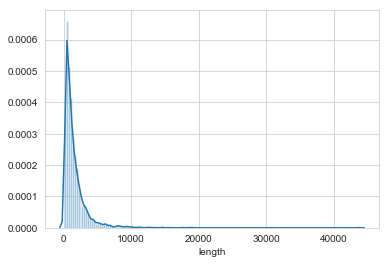

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['length'], bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB55131E48>,
      dtype=object)

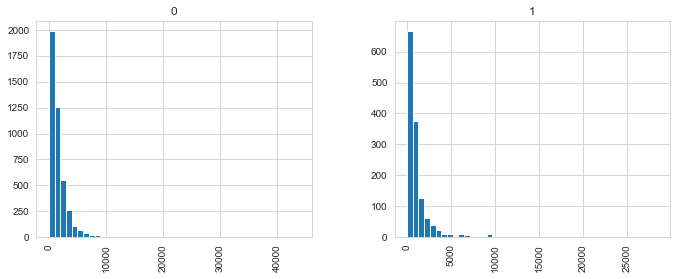

In [ ]:
df.hist(column='length', by='label', bins=44, figsize=(11,4))

## Cleaning up the data

Let's start by removing punctuations like '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~' such from our data.<br><br>
Then next we can try to remove stop words from our email messages because those words do not really help us to classify the data.


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
def refine_message(message):
    nsubject = [i for i in message.split() if i not in ['Subject:']]
    nsubject = ' '.join(nsubject)
    nm = [msg for msg in nsubject if msg not in string.punctuation]    
    nm = ''.join(nm)
    cleaned = [word for word in nm.split() if word.lower() not in stopwords.words('english')]
    
    return ' '.join(cleaned)

Let's try our refiner

In [54]:
dd = df.copy()

In [55]:
dd.head()

,Message,label,length
1,Subject: naturally irresistible your corporate...,1,1484
2,Subject: the stock trading gunslinger fanny i...,1,598
3,Subject: unbelievable new homes made easy im ...,1,448
4,Subject: 4 color printing special request add...,1,500
5,"Subject: do not have money , get software cds ...",1,235


In [56]:
dd['Message'] = dd['Message'].apply(refine_message)

In [57]:
dd['Message'][4]

'4 color printing special request additional information click click printable version order form pdf format phone 626 338 8090 fax 626 338 8102 e mail ramsey goldengraphix com request additional information click click printable version order form pdf format golden graphix printing 5110 azusa canyon rd irwindale ca 91706 e mail message advertisement solicitation'

In [58]:
dd.head()

,Message,label,length
1,naturally irresistible corporate identity lt r...,1,1484
2,stock trading gunslinger fanny merrill muzo co...,1,598
3,unbelievable new homes made easy im wanting sh...,1,448
4,4 color printing special request additional in...,1,500
5,money get software cds software compatibility ...,1,235


We see now, We can have refined text data with key words only.

## Vectorization

In [63]:
vTransformer = CountVectorizer().fit(dd.Message)

In [61]:
ms = dd['Message'][5]

In [62]:
ms

'money get software cds software compatibility great grow old along best yet tradgedies finish death comedies ended marriage'

In [64]:
mv = vTransformer.transform([ms])

In [69]:
print('matrix\n',mv)
print('shape',mv.shape)

matrix
   (0, 4581)	1
  (0, 6499)	1
  (0, 8128)	1
  (0, 9162)	1
  (0, 9287)	1
  (0, 10890)	1
  (0, 13214)	1
  (0, 14733)	1
  (0, 15807)	1
  (0, 16212)	1
  (0, 16318)	1
  (0, 21661)	1
  (0, 22741)	1
  (0, 24318)	1
  (0, 31272)	2
  (0, 33963)	1
  (0, 36858)	1
shape (1, 37187)


In [71]:
print(vTransformer.get_feature_names()[31272])

software


Since comes twice in ms

Let's transform our whole data

In [72]:
vMessage = vTransformer.transform(dd.Message)

In [73]:
vMessage.shape

(5728, 37187)

Vectorizing just on the basis of number of counts is very basic, so now we are going to improvise it by using TF-IDF (Term frequency- Inverse documentary frequency)

In [75]:
tfidf = TfidfTransformer().fit(vMessage)

In [76]:
t5 = tfidf.transform(mv)
print(t5)

  (0, 36858)	0.1669539923526634
  (0, 33963)	0.362050404773033
  (0, 31272)	0.30135672966370536
  (0, 24318)	0.19661129315708292
  (0, 22741)	0.15133185733235438
  (0, 21661)	0.2931670937514894
  (0, 16318)	0.2390311816135565
  (0, 16212)	0.1322582765247842
  (0, 15807)	0.10061778554527989
  (0, 14733)	0.23535530872602634
  (0, 13214)	0.2690104501683525
  (0, 10890)	0.2500191362481371
  (0, 9287)	0.3012755421441658
  (0, 9162)	0.362050404773033
  (0, 8128)	0.2526269274195309
  (0, 6499)	0.11025721696262027
  (0, 4581)	0.17286075087044825


In [77]:
tMessage = tfidf.transform(vMessage)

We can now see that we've put weights instead of the original 0-1 values.

## Classifier

We'll use two classifiers to finally classify our data into appropriate label (0 or 1)<br>
We have MultinomialNB ( Naive bayes) &<br>
then we have RandomForests

## Training

Let's start by spliting our data into training and testing sets and then we'll create a pipeline to go through all the steps i.e vectorizing, transforming and classifying in one go.

In [83]:
# spliting

In [84]:
m_train, m_test, l_train, l_test = train_test_split(dd['Message'], dd['label'], test_size=0.3)

In [85]:
# creating pipeline

In [96]:
pipeline = Pipeline([
    ('vectorizing', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
pipelineF = Pipeline([
    ('vectorizing', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [97]:
pipeline.fit(m_train, l_train)

Pipeline(memory=None,
     steps=[('vectorizing', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
      ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [98]:
pipelineF.fit(m_train, l_train)

C:\Users\uV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('vectorizing', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
      ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [88]:
# predictions

In [99]:
predictions = pipeline.predict(m_test)

In [100]:
predictionsF = pipelineF.predict(m_test)

## Results

In [90]:
print('MultinomialNB model results')
print()
print(classification_report(l_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1321
           1       1.00      0.62      0.77       398

   micro avg       0.91      0.91      0.91      1719
   macro avg       0.95      0.81      0.86      1719
weighted avg       0.92      0.91      0.90      1719



In [101]:
print(' model results')
print()
print(classification_report(l_test, predictionsF))

 model results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1321
           1       0.97      0.83      0.90       398

   micro avg       0.96      0.96      0.96      1719
   macro avg       0.96      0.91      0.93      1719
weighted avg       0.96      0.96      0.95      1719



# Conclusion

We can say that we've got some decent results.<br>
RandomForests classifier performs better than the MultinomialNB classifier